In [3]:
!pip install researchpy

In [4]:
import pandas as pd
import researchpy as py
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as s
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#####KEEP CATEGORY OF INTEREST IN POS 0

##this is so close cat = ['WorkLifeBalanceLeisure','SafetyHomicide']

cat = ['CommunitySupport','HousingRooms','LifeSatisfaction']##columns of interest

def readcsv(name, cat_Type, *categories):##load the csv
    df = pd.read_csv(name)

##for some reason, the data is saved with string(text) entries, making it impossible to work with
    df = df.replace(r'^\s*$', np.nan, regex=True)##replace empty strings with nans

    for category in categories:
        df[category] = df[category].astype(cat_Type)##change the type of columns of interest
        
    return df

df =readcsv('2020Data.csv',float,cat)




def percentiles(dfz,percentile,label,cat_v ,percentile_cat):##function to cut percentile in category
    
    percentile_label = []##empty arrays to hold stuff
    cat_Var = []

    for i in percentile:#for the values passed in the percentile array
         percentile_label.append(np.nanpercentile(dfz[percentile_cat],i))##append to the label array the value of
            ##of the percentiles
            
    dfz[cat_v] = pd.cut(dfz[percentile_cat],
                             bins = [percentile_label[0],percentile_label[1],percentile_label[2],
                                     percentile_label[3],float('Inf')],
                             labels =label, precision = 4 )##this bit actually does the cut into the percentile 
    ##and adds the new categorical variable to the end of the dataframe
#         print(category[z])
    cat_Var.append(dfz[percentile_cat].dropna())#drop nans since they're hard to work with, alternativley could
    #use method to replace them
#         print(z)

    print(percentile_label)
    return dfz,cat_Var##return the new dataframe and the categorical variable name

df,cat_Var = percentiles(df,[0,25,50,75],[0,1,2,3],'wlblP',cat[1])
df2,cat_Var2 = percentiles(df,[0,25,50,75],[0,1,2,3],'wlhlP',cat[0])

# print(df['wlblP'])
# print(df[cat[0]])

new_df = df[[cat[0],cat[1],'wlblP','wlhlP',cat[2]]]##create new dataframe with only columns of interest
new_df = new_df.dropna()#drop nans again
new_df = new_df.drop(10)#outliers
wlbh13 =  new_df[cat[0]].dropna()#dropna() is reduntant, leftover from old code
wlbl13 = new_df[cat[1]].dropna()
##here we define the model we're interested in looking at for our anova, so Life satisifaction in groups of community support and housing rooms
model = ols('LifeSatisfaction ~ C(wlblP) + C(wlhlP)+C(wlblP):C(wlhlP)',data = new_df[['LifeSatisfaction','wlblP','wlhlP']]).fit()
aov_table = anova_lm(model,typ=1)#do the anova
#same as above but insignificant results are dropped
model1 = ols('LifeSatisfaction ~ C(wlblP) + C(wlhlP)',data = new_df[['LifeSatisfaction','wlblP','wlhlP']]).fit()
aov_table1 = anova_lm(model1,typ=1)



# print(df['wlblP'].dropna())
# print(wlbh13)
print(aov_table)
print(aov_table1)
print(new_df)
##p val less than alpha, significant result, wlbl and wlbh have significant difference
res = model1.resid ##make qq plot of residuals
fig = sm.qqplot(res, line='s')
plt.show()


FileNotFoundError: [Errno 2] File 2020Data.csv does not exist: '2020Data.csv'

In [1]:
stats.levene(new_df[cat[2]][new_df['wlblP']==0].dropna(),
              new_df[cat[2]][new_df['wlblP']==1].dropna(),##do a leven test on the groups of interest
              new_df[cat[2]][new_df['wlblP']==2].dropna(),
              new_df[cat[2]][new_df['wlblP']==3].dropna(),
              new_df[cat[2]][new_df['wlhlP']==0].dropna(),
              new_df[cat[2]][new_df['wlhlP']==1].dropna(),
              new_df[cat[2]][new_df['wlhlP']==2].dropna(),
              new_df[cat[2]][new_df['wlhlP']==3].dropna(),center = 'mean')

#same variance from levene barely



NameError: name 'stats' is not defined

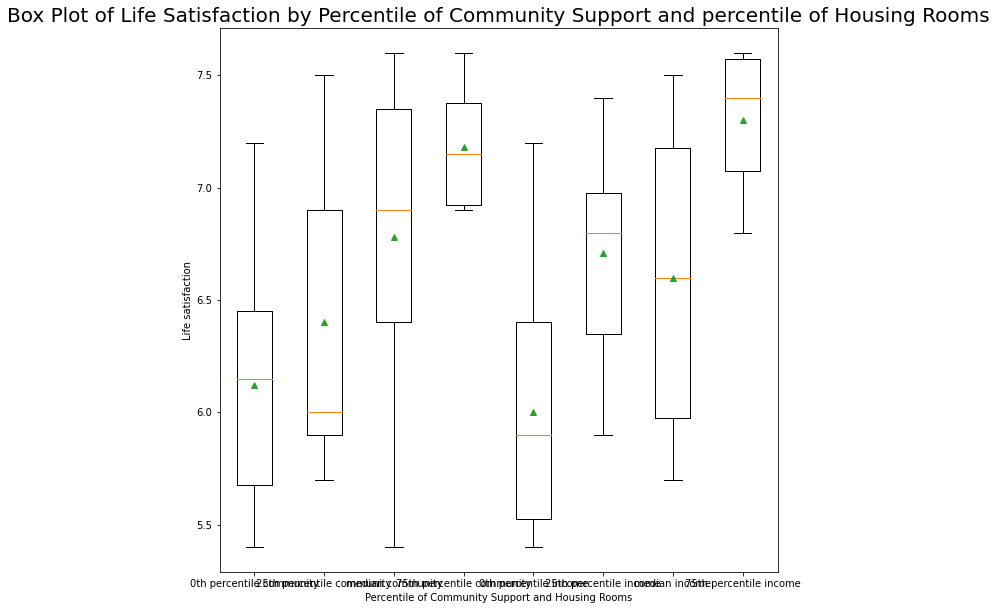

In [142]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Life Satisfaction by Percentile of Community Support and percentile of Housing Rooms", fontsize= 20)
ax.set##box plot the data

data = [new_df[cat[2]][new_df['wlblP']==0].dropna(),
              new_df[cat[2]][new_df['wlblP']==1].dropna(),
              new_df[cat[2]][new_df['wlblP']==2].dropna(),
              new_df[cat[2]][new_df['wlblP']==3].dropna(),
              new_df[cat[2]][new_df['wlhlP']==0].dropna(),
              new_df[cat[2]][new_df['wlhlP']==1].dropna(),
              new_df[cat[2]][new_df['wlhlP']==2].dropna(),
              new_df[cat[2]][new_df['wlhlP']==3].dropna()]

ax.boxplot(data,
           labels= ['0th percentile community', '25th percentile community', 'median community',
                    '75th percentile community', '0th percentile income', '25th percentile income'
                    ,'median income', '75th percentile income'],
           showmeans= True)

plt.xlabel("Percentile of Community Support and Housing Rooms")
plt.ylabel("Life satisfaction")

plt.show()

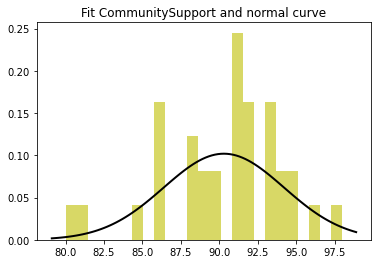

In [141]:
mu,std = stats.norm.fit(wlbh13)##calculate normal fit for histogram

plt.hist(wlbh13, bins=25, density = True, alpha=0.6, color = 'y')##actually plot the histogram and normal curve
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
title = "Fit CommunitySupport and normal curve"
plt.title(title)
plt.show()

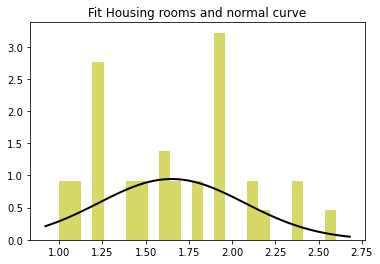

In [140]:
mu,std = stats.norm.fit(wlbl13)

plt.hist(wlbl13, bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
title = "Fit Housing rooms and normal curve"
plt.title(title)
plt.show()

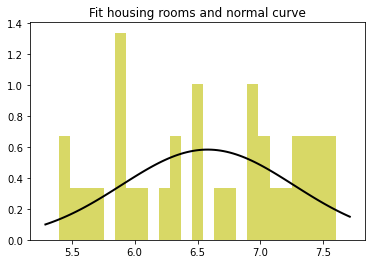

In [139]:
mu,std = stats.norm.fit(new_df[cat[2]])

plt.hist(new_df[cat[2]], bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
title = "Fit Life satisfaction and normal curve"
plt.title(title)
plt.show()

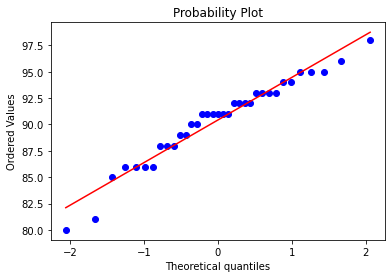

ShapiroResult(statistic=0.955682635307312, pvalue=0.16922929883003235)

In [62]:
fig = plt.figure()
ax=fig.add_subplot(111)
res = stats.probplot(new_df[cat[0]],plot=ax)##pp plot and shapiro-wilks test
plt.show()
stats.shapiro(new_df[cat[0]])

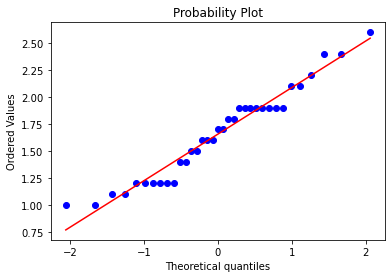

ShapiroResult(statistic=0.9514173269271851, pvalue=0.1252715140581131)

In [63]:
fig = plt.figure()
ax=fig.add_subplot(111)
res = stats.probplot(new_df[cat[1]],plot=ax)
plt.show()
stats.shapiro(new_df[cat[1]])

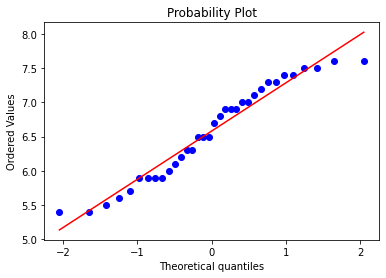

ShapiroResult(statistic=0.940391480922699, pvalue=0.06332730501890182)

In [136]:
fig = plt.figure()
ax=fig.add_subplot(111)
res = stats.probplot(new_df[cat[2]],plot=ax)
plt.show()
stats.shapiro(new_df[cat[2]])